**1.3.5. Some exercises**

# 1.3.5.1. Array manipulations

1. Form the 2-D array (without typing it in explicitly):



In [1]:
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]

[[1, 6, 11], [2, 7, 12], [3, 8, 13], [4, 9, 14], [5, 10, 15]]

and generate a new array containing its 2nd and 4th rows.

2. Divide each column of the array:

In [5]:
import numpy as np
a = np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

3. Harder one: Generate a 10 x 3 array of random numbers (in range [0,1]). For each row, pick the number closest to 0.5.
    - Use `abs` and `argsort` to find the column `j` closest for each row.
    - Use fancy indexing to extract the numbers. (Hint: `a[i,j]` – the array `i` must contain the row numbers corresponding to stuff in `j`.)
    
# 1.3.5.2. Picture manipulation: Framing a Face   

Let’s do some manipulations on numpy arrays by starting with an image of a racoon. `scipy` provides a 2D array of this image with the `scipy.misc.face` function:

In [6]:
from scipy import misc
face = misc.face(gray=True)  # 2D grayscale image
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

Here are a few images we will be able to obtain with our manipulations: use different colormaps, crop the image, change some parts of the image.

<div align="center">
    <img src="http://scipy-lectures.org/_images/faces.png">
</div>    

- Let’s use the imshow function of matplotlib to display the image.

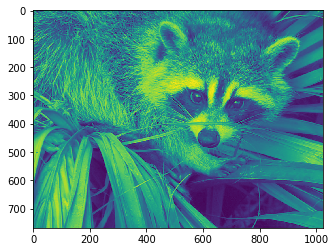

In [10]:
import matplotlib.pyplot as plt
face = misc.face(gray=True)
plt.imshow(face)  

- The face is displayed in false colors. A colormap must be specified for it to be displayed in grey.

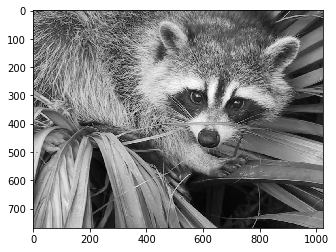

In [11]:
plt.imshow(face, cmap=plt.cm.gray)  

- Create an array of the image with a narrower centering : for example,remove 100 pixels from all the borders of the image. To check the result, display this new array with `imshow`.

In [13]:
crop_face = face[100:-100, 100:-100]

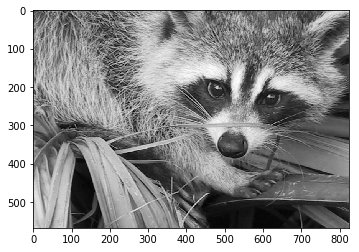

In [17]:
plt.imshow(crop_face, cmap=plt.cm.gray) 

-We will now frame the face with a black locket. For this, we need to create a mask corresponding to the pixels we want to be black. The center of the face is around (660, 330), so we defined the mask by this condition `(y-300)**2 + (x-660)**2`
 

In [19]:
sy, sx = face.shape
sy, sx

(768, 1024)

In [21]:
y, x = np.ogrid[0:sy, 0:sx] # x and y indices of pixels
y.shape, x.shape

((768, 1), (1, 1024))

In [22]:
centerx, centery = (660, 300) # center of the image
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2 # circle

then we assign the value 0 to the pixels of the image corresponding to the mask. The syntax is extremely simple and intuitive:

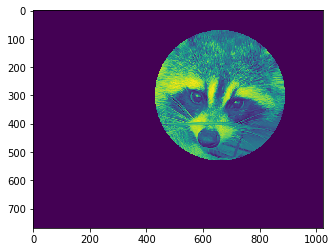

In [23]:
face[mask] = 0
plt.imshow(face) 

- Follow-up: copy all instructions of this exercise in a script called `face_locket.py` then execute this script in IPython with `%run face_locket.py`.  Change the circle to an ellipsoid.

# 1.3.5.3. Data statistics

The data in **populations.txt** describes the populations of hares and lynxes (and carrots) in northern Canada during 20 years:

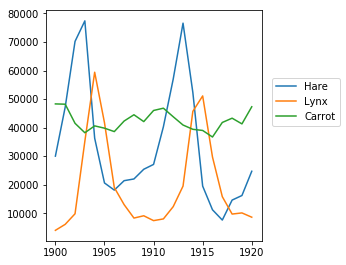

In [25]:
data = np.loadtxt('code/populations.txt')
year, hares, lynxes, carrots = data.T  # trick: columns to variables

import matplotlib.pyplot as plt
plt.axes([0.2, 0.1, 0.5, 0.8]) 

plt.plot(year, hares, year, lynxes, year, carrots) 

plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

Computes and print, based on the data in `populations.txt`…

1. The mean and std of the populations of each species for the years in the period.
1. Which year each species had the largest population.
1. Which species has the largest population for each year. (Hint: `argsort` & fancy indexing of `np.array(['H', 'L', 'C'])`)
1. Which years any of the populations is above 50000. (Hint: comparisons and `np.any`)
1. The top 2 years for each species when they had the lowest populations. (Hint: argsort, fancy indexing)
1. Compare (plot) the change in hare population (see `help(np.gradient)`) and the number of lynxes. Check correlation (see `help(np.corrcoef)`).
… all without for-loops.

Solution: [Python source file](http://scipy-lectures.org/_downloads/2_2_data_statistics.py)

# 1.3.5.4. Crude integral approximations

Write a function `f(a, b, c)` that returns $a^b - c$. Form a 24x12x6 array containing its values in parameter ranges `[0,1] x [0,1] x [0,1]`.

Approximate the 3-d integral $\int_0^1\int_0^1\int_0^1(a^b-c)da\,db\,dc $  :

<div align="center">
    <img src="http://scipy-lectures.org/_images/math/b8bb0840b51839d5ec1b8fc51a1017b42a6e5144.png">
</div>    


over this volume with the mean. The exact result is: $\ln 2 - \frac{1}{2}\approx0.1931\ldots$ — what is your relative error?

(Hints: use elementwise operations and broadcasting. You can make np.ogrid give a number of points in given range with `np.ogrid[0:1:20j]`.)

**Reminder** Python functions:




In [26]:
def f(a, b, c):
    return some_result

Solution: [Python source file](http://scipy-lectures.org/_downloads/2_3_crude_integration.py)

# 1.3.5.5. Mandelbrot set (曼德布洛特集合)

Write a script that computes the Mandelbrot fractal. The Mandelbrot iteration:


<div align="center">
    <img src="http://scipy-lectures.org/_images/sphx_glr_plot_mandelbrot_001.png">
</div>    

In [29]:
N_max = 50
some_threshold = 50

c = x + 1j*y

z = 0
for j in range(N_max):
    z = z**2 + c

/home/qinjh/workspace/python/DataAnalysisWithPython/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/home/qinjh/workspace/python/DataAnalysisWithPython/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in square
  


Point (x, y) belongs to the Mandelbrot set if $|z|$ < some_threshold.

Do this computation by:

- Construct a grid of c = x + 1j*y values in range [-2, 1] x [-1.5, 1.5]
- Do the iteration
- Form the 2-d boolean mask indicating which points are in the set
- Save the result to an image with:

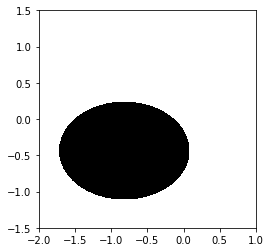

In [30]:
import matplotlib.pyplot as plt
plt.imshow(mask.T, extent=[-2, 1, -1.5, 1.5]) 

plt.gray()
plt.savefig('code/mandelbrot.png')


Solution: [Python source file](http://scipy-lectures.org/_downloads/2_4_mandelbrot.py)

# 1.3.5.6. Markov chain (马尔可夫链)

<div align="center">
    <img src="http://scipy-lectures.org/_images/markov-chain.png">
</div>    

Markov chain transition matrix P, and probability distribution on the states p:

1. ` <= P[i,j] <= 1`: probability to go from state i to state j
1. Transition rule: $p_{new} = P^T p_{old}$
1. `all(sum(P, axis=1) == 1)`, `p.sum() == 1`: normalization

Write a script that works with 5 states, and:
- Constructs a random matrix, and normalizes each row so that it is a transition matrix.
- Starts from a random (normalized) probability distribution p and takes 50 steps => `p_50`
- Computes the stationary distribution: the eigenvector of `P.T` with eigenvalue 1 (numerically: closest to 1) => `p_stationary`

Remember to normalize the eigenvector — I didn’t…
- Checks if p_50 and p_stationary are equal to tolerance 1e-5

Toolbox: `np.random.rand`, `.dot()`, `np.linalg.eig`, reductions, `abs()`, `argmin`, comparisons, `all`, `np.linalg.norm`, etc.

Solution: [Python source file](http://scipy-lectures.org/_downloads/2_5_markov_chain.py)

**[Full code examples for the numpy chapter](http://scipy-lectures.org/intro/numpy/gallery.html)**